<a href="https://colab.research.google.com/github/heerboi/HandsOnML-stuff/blob/main/Training_Models_Hands_on_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands on ML - Chapter 4
# Training Models


## Topics:
1.

### Dataset

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
m = 100 # Num examples
X = 6 * np.random.rand(m, 1) - 3
X = np.array(sorted(X))
y = 4 * X ** 2 + X**3 + 0.5*X**2 + 50 + np.random.randn(m, 1) # 1/2 * x^2 + x + 2 + noise

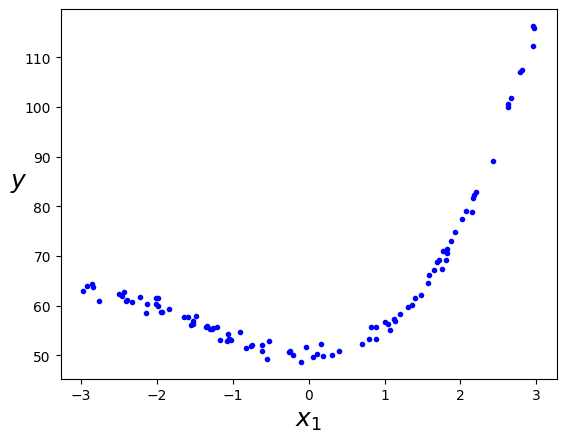

In [8]:
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

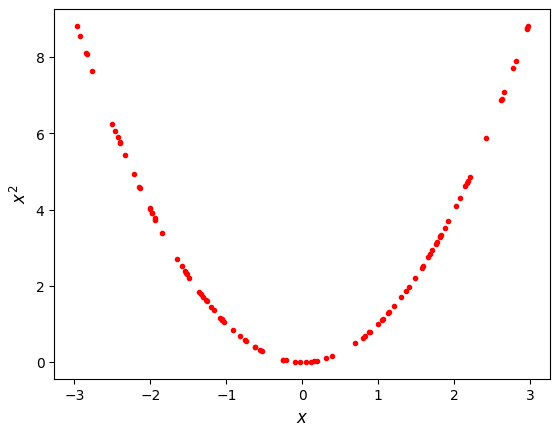

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2_deg = poly_features.fit_transform(X)
poly_features = PolynomialFeatures(degree=300, include_bias=False)
X_poly_300_deg = poly_features.fit_transform(X)
plt.plot(X_poly_2_deg[:, 0], X_poly_2_deg[:, 1], 'r.')
plt.ylabel("$x^2$", fontsize=12)
plt.xlabel("$x$", fontsize=12)
plt.show()

### Training Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

linear_models = [LinearRegression() for i in range(3)]
linear_models[0].fit(X, y)
linear_models[1].fit(X_poly_2_deg, y)
linear_models[2].fit(X_poly_300_deg, y)

LinearRegression()

In [11]:
preds_1 = linear_models[0].predict(X)
preds_2 = linear_models[1].predict(X_poly_2_deg)
preds_3 = linear_models[2].predict(X_poly_300_deg)

In [12]:
X = X.reshape(-1)

In [13]:
from scipy.interpolate import BSpline, make_interp_spline

X_new = np.linspace(min(X), max(X), 500)
X_new_spline = make_interp_spline(X, preds_1, k=3)
smooth_y = X_new_spline(X_new)

X_poly_2_deg_new = np.linspace(min(X), max(X), 500)
X_poly_2_deg_spline = make_interp_spline(X, preds_2, k=3)
smooth_y2 = X_poly_2_deg_spline(X_new)

X_poly_200_deg_new = np.linspace(min(X), max(X), 500)
X_poly_200_deg_spline = make_interp_spline(X, preds_3, k=3)
smooth_y200 = X_poly_200_deg_spline(X_new)

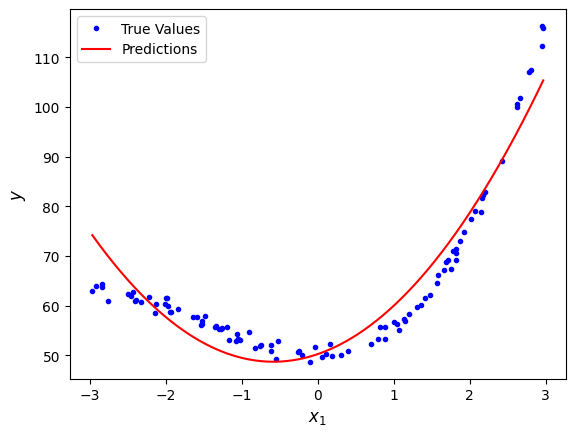

In [14]:
plt.plot(X, y, 'b.', label="True Values")
plt.plot(X_new, smooth_y2, 'r-', label="Predictions")
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend(loc="upper left")
plt.show()

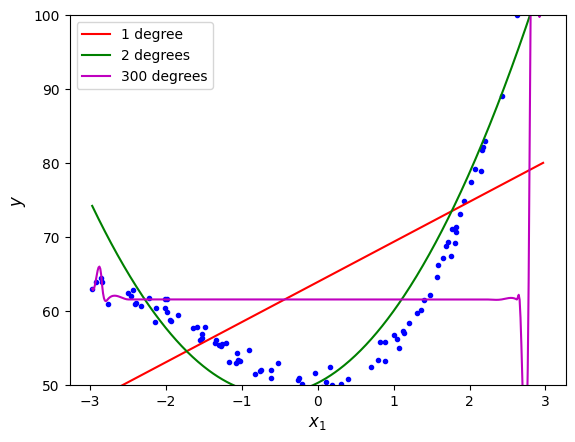

In [15]:
plt.plot(X, y, 'b.')
plt.plot(X_new, smooth_y, 'r-', label="1 degree")
plt.plot(X_new, smooth_y2, 'g-', label="2 degrees")
plt.plot(X_new, smooth_y200, 'm-', label="300 degrees")
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend(loc="upper left")
plt.ylim(50,100)
plt.show()

### Exercise Answers

---



1. **Which linear regression training algorithm can you use if you have a training set with millions of features?**

-> As the computational complexity of using the Normal Equation increases more than quadratically as num of features > num of examples, we can use Batch, Mini-batch or Stochastic Gradient Descent.

2. **Suppose the features in your training set have very different scales. Which algorithms might suffer from this, and how? What can you do about it?**

-> The Normal Equation works solely through matrix multiplication, finding the global minima. Hence, it doesn't require the features to be of the same scale. However, it results in an "elongated bowl" in the case of Gradient Descent. It would take much longer to converge. Regularised models penalise weights based on their values, and, in case of different scales, smaller features will end up being ignored.

3. **Can gradient descent get stuck in a local minimum when training a logistic regression model?**

-> The Logistic Regression cost function (least squares) is a convex cost function. Any two points on the loss curve will never cross the curve itself (and hence it only has one minimum).

4. **Do all gradient descent algorithms lead to the same model, provided you let them run long enough?**

-> If the cost function is convex and the learning rate is not too high to overfit/underfit, all gradient descent algorithms are expected to reach the global minimum. Stochastic and Mini-batch GD will not converge unless their learning rates are gradually reduced, and will keep bouncing around the global minimum.